Import libraries

In [16]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

With this function we can see the different's datasets available on tensorflow datasets

In [17]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy

Load the dataset that we are going to use in this case celeb_a

In [18]:
dataset, info = tfds.load('celeb_a', split='test',shuffle_files=False, with_info=True)

If you are having trouble downloading the dataset, please uncomment this code and  follow the steps below to download it manually.

In [19]:
"""from os import path
tfds_root = 'res'
celeb_path = path.join(tfds_root. 'celeb_a.zip')
celeb_dir = celeb_path.replace('.zip', '')

if not path.exists(tfds_root):
    os.mkdir(tfds_root) """

"from os import path\ntfds_root = 'res'\nceleb_path = path.join(tfds_root. 'celeb_a.zip')\nceleb_dir = celeb_path.replace('.zip', '')\n\nif not path.exists(tfds_root):\n    os.mkdir(tfds_root) "

Download the dataset

In [20]:
"""import gdown
url = 'YOUR_DATASET_URL'
gdown.download(url,celeb_path, quiet = False) """

"import gdown\nurl = 'YOUR_DATASET_URL'\ngdown.download(url,celeb_path, quiet = False) "

Unzip the dataset

In [21]:
"""import zipfile as zp
with zp.ZipFile(celeb_path, 'r') as zipp:
    zipp.extractall(celeb_dir) """

"import zipfile as zp\nwith zp.ZipFile(celeb_path, 'r') as zipp:\n    zipp.extractall(celeb_dir) "

Load the dataset

In [22]:
"""dataset, info = tfds.load('celeb_a',  split='test',  shuffle_files=False,  with_info=True,  data_dir= tfds_root)"""

"dataset, info = tfds.load('celeb_a',  split='test',  shuffle_files=False,  with_info=True,  data_dir= tfds_root)"

Generate new image

In [23]:
batch_size = 1000
dataset_b = dataset.batch(batch_size)
features = next(iter(dataset_b.take(1)))
dims = features['image'].shape
print(f"Shape of Tensor =  {dims[0]} elements, Size = {dims[1]} x {dims[2]} x {dims[3]}")

Shape of Tensor =  1000 elements, Size = 218 x 178 x 3


In [24]:
def show_image(image):
    fig = plt.figure(figsize=(10,8))
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    plt.show()

In [25]:
def generate_image_mean(sample_images):
    return np.mean(sample_images, axis=0)

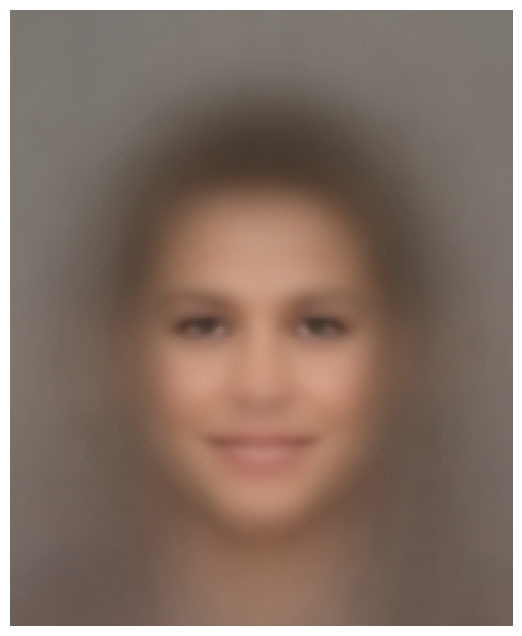

In [26]:
sample_images = features['image']
show_image(generate_image_mean(sample_images))

Generate image by attribute

In [27]:
#Get All the attributes
list(features['attributes'].keys())

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

In [28]:
def filter_dataset(dataset, attributes, batch_size, dims):
    samples = np.empty([0, dims[1], dims[2], dims[3]])
    for features in dataset.take(len(dataset)-1):
        sub_samples = filter_batch(features, attributes, batch_size)
        samples = np.append(samples, sub_samples, axis=0)
    return samples

In [29]:
def filter_batch(features, attributes, batch_size):
    attribute_values = np.empty((batch_size, len(attributes)))
    for i, (key, value) in enumerate(attributes.items()):
        attribute_values[:, i] = features['attributes'][key]
    filter_list = np.all(attribute_values == np.array(list(attributes.values())), axis=1)
    return features['image'][filter_list]

Sample Size 15


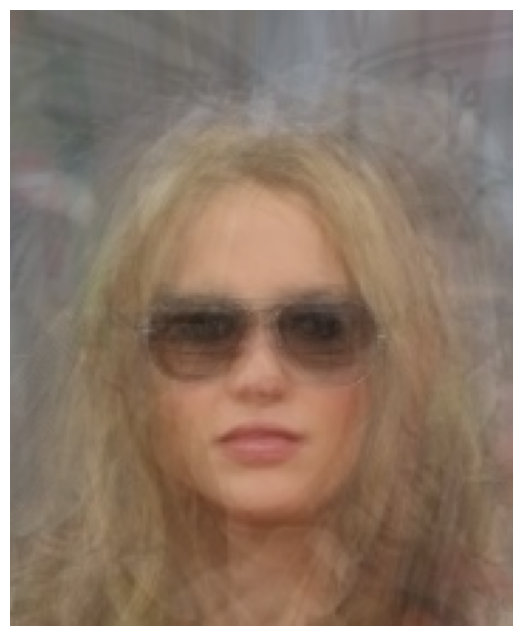

In [30]:
attributes = {
    'Male': False,
    'Blond_Hair': True,
    'Smiling': False,
    'Young': True,
    'Eyeglasses': True
}

sample_images = filter_dataset(dataset_b, attributes, batch_size, dims)
print(f"Sample Size {len(sample_images)}")
show_image(generate_image_mean(sample_images))